In [1]:
!cp /content/drive/MyDrive/frames1.zip /content/

In [2]:
!unzip frames1.zip
!ls frames

Archive:  frames1.zip
   creating: frames/
  inflating: frames/0001.png         
  inflating: frames/0002.png         
  inflating: frames/0003.png         
  inflating: frames/0004.png         
  inflating: frames/0005.png         
  inflating: frames/0006.png         
  inflating: frames/0007.png         
  inflating: frames/0008.png         
  inflating: frames/0009.png         
  inflating: frames/0010.png         
  inflating: frames/0011.png         
  inflating: frames/0012.png         
  inflating: frames/0013.png         
  inflating: frames/0014.png         
  inflating: frames/0015.png         
  inflating: frames/0016.png         
  inflating: frames/0017.png         
  inflating: frames/0018.png         
  inflating: frames/0019.png         
  inflating: frames/0020.png         
  inflating: frames/0021.png         
  inflating: frames/0022.png         
  inflating: frames/0023.png         
  inflating: frames/0024.png         
  inflating: frames/0025.png         
  infla

In [3]:
!pip install diffusers transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 18.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

In [4]:
!pip install opencv-contrib-python
!pip install controlnet aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of controlnet to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement cudatoolkit~=11.3 (from controlnet) (from versions: none)
ERROR: No matching distribution found for cudatoolkit~=11.3


In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
ControlNet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [8]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "dreamlike-art/dreamlike-diffusion-1.0", controlnet=ControlNet, torch_dtype=torch.float16
).to(device)

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
from diffusers.utils import load_image
from PIL import Image
import numpy as np

In [10]:
image = load_image("frames/0001.png")
image = np.array(image)

In [11]:
image.shape

(1280, 720, 3)

In [12]:
def create_canny_input(image, low_threshold = 100, hig_threshold = 255):
    low_threshold = 100
    high_threshold = 255
    canny_input = cv2.Canny(image, low_threshold, high_threshold)
    canny_input = canny_input[:, :, None] # Adds channel dimension after H and W
    canny_input = np.repeat(canny_input, 3, axis=2) # concatenates 3 arays on channel dimension
    return canny_input

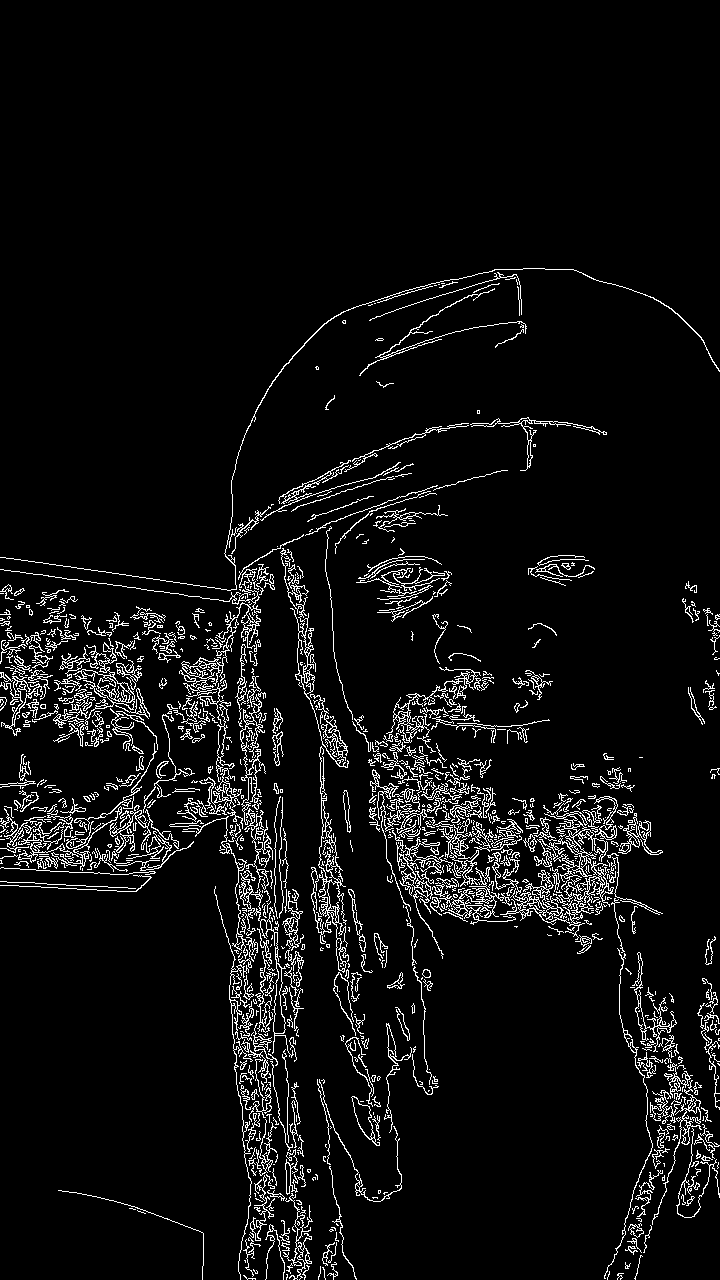

In [13]:
canny_input = create_canny_input(image)
canny_input = Image.fromarray(canny_input)
canny_input

In [14]:
from diffusers import DDIMScheduler

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [15]:
prompt = ["masterpiece, man, cg style"]
output = pipe(
    prompt,
    canny_input,
    negative_prompt=[""],
    num_inference_steps=20,
    guidance_scale = 5,
    controlnet_conditioning_scale=0.9
)

  0%|          | 0/20 [00:00<?, ?it/s]

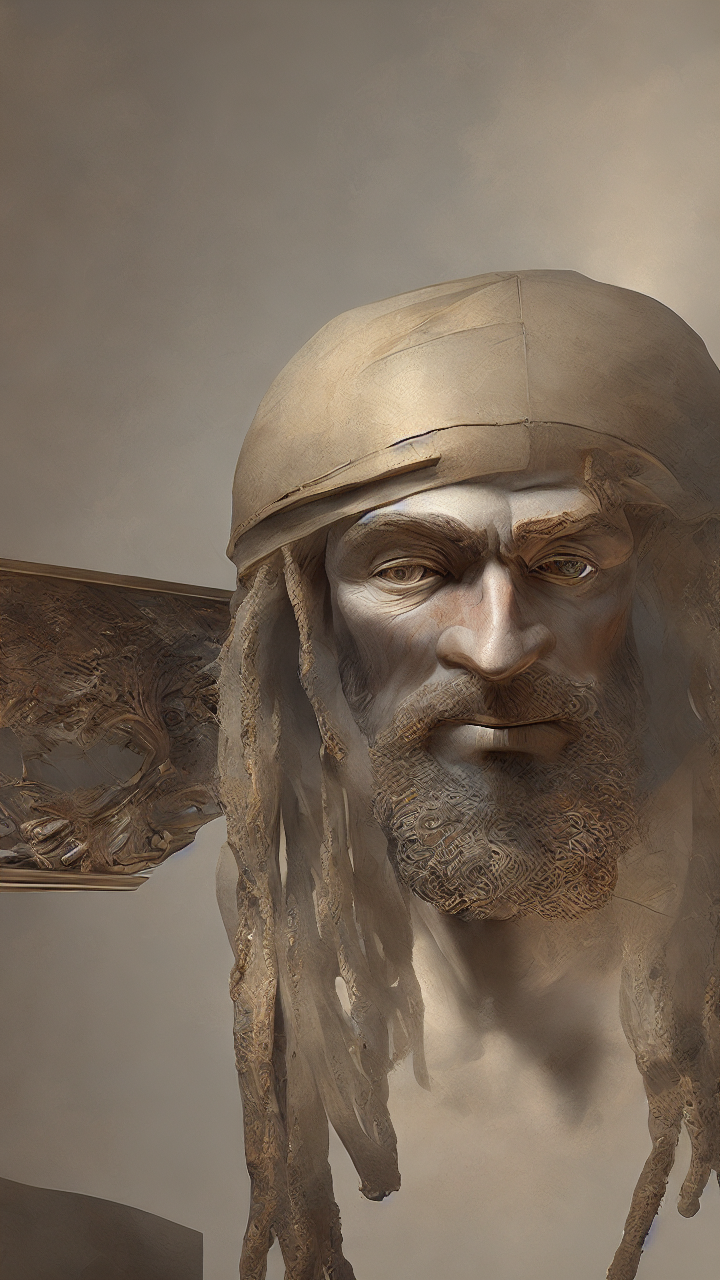

In [16]:
output[0][0]

In [17]:
scheduler = pipe.scheduler
unet = pipe.unet
E = pipe.vae.encode
D = pipe.vae.decode
vae_scaling_factor = pipe.vae.config.scaling_factor
clip_tokenizer = pipe.tokenizer
clip_transformer = pipe.text_encoder
ControlNet = pipe.controlnet

In [18]:
positive_prompt = ["digital painting, man, blue sky, cyborg city, Stanley Artgerm Lau, fantasy artwork"]
negative_prompt = ["ugly, tiling, poorly drawn hands, deformed, body out of frame, blurry, bad anatomy, blurred, watermark"]

In [19]:
positive_prompt_input = clip_tokenizer(positive_prompt, padding="max_length", max_length=clip_tokenizer.model_max_length, truncation=True, return_tensors="pt") #clip_tokenizer.model_max_length == 77, return_tensors="pt" means pytorch
negative_prompt_input = clip_tokenizer(negative_prompt, padding="max_length", max_length=clip_tokenizer.model_max_length, return_tensors="pt")

In [20]:
positive_prompt_input, positive_prompt_input.input_ids.shape

({'input_ids': tensor([[49406,  2794,  3086,   267,   786,   267,  1746,  2390,   267, 36650,
           1305,   267, 10079,  1486,  1291,   332, 23090,   267,  5267,  4188,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
          49407, 49407, 49407, 49407, 49407, 49407, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]])},
 torch.Size([1, 77]))

In [21]:
with torch.no_grad():
  Cp_positive = clip_transformer(positive_prompt_input.input_ids.to(device))[0]
  Cp_negative = clip_transformer(negative_prompt_input.input_ids.to(device))[0]

Cp = torch.cat([Cp_negative, Cp_positive])
Cp.shape

torch.Size([2, 77, 768])

In [22]:
def prepare_prompts(positive_prompt, negative_prompt):
  positive_prompt_input = clip_tokenizer(positive_prompt, padding="max_length", max_length=clip_tokenizer.model_max_length, truncation=True, return_tensors="pt") #clip_tokenizer.model_max_length == 77, return_tensors="pt" means pytorch
  negative_prompt_input = clip_tokenizer(negative_prompt, padding="max_length", max_length=clip_tokenizer.model_max_length, return_tensors="pt")
  with torch.no_grad():
    Cp_positive = clip_transformer(positive_prompt_input.input_ids.to(device))[0]
    Cp_negative = clip_transformer(negative_prompt_input.input_ids.to(device))[0]

  Cp = torch.cat([Cp_negative, Cp_positive])
  return Cp

In [23]:
Cp = prepare_prompts(positive_prompt, negative_prompt)

Create latents

In [24]:
import torchvision.transforms as transforms

image = load_image("frames/0001.png")
image = transforms.ToTensor()(image).unsqueeze(0).to(device, torch.float16)
print(image.shape)
print("max: ", image.max())
print("min: ", image.min())
#max value in tensor now normalized to 1, min value = 0, need to convert to range -1 to 1
image = image * 2 - 1
print("new max: ", image.max())
print("new min: ", image.min())

with torch.no_grad():
  X0 = E(image).latent_dist.sample() * vae_scaling_factor # latent representation at time step 0, E - encoder, latent_dist - latent distribution
  noise = torch.randn(X0.shape).to(device)
  T = scheduler.timesteps[0]
  XT = scheduler.add_noise(X0, noise, T) # latent representation at timestep T

torch.Size([1, 3, 1280, 720])
max:  tensor(1., device='cuda:0', dtype=torch.float16)
min:  tensor(0., device='cuda:0', dtype=torch.float16)
new max:  tensor(1., device='cuda:0', dtype=torch.float16)
new min:  tensor(-1., device='cuda:0', dtype=torch.float16)


In [25]:
XT.shape, X0.shape

(torch.Size([1, 4, 160, 90]), torch.Size([1, 4, 160, 90]))

In [26]:
def create_latents(image, T = scheduler.timesteps[0]):
  image = transforms.ToTensor()(image).unsqueeze(0).to(device, torch.float16)
  image = image * 2 - 1

  with torch.no_grad():
    X0 = E(image).latent_dist.sample() * vae_scaling_factor # latent representation at time step 0, E - encoder, latent_dist - latent distribution
    noise = torch.randn(X0.shape).to(device)
    XT = scheduler.add_noise(X0, noise, T) # latent representation at timestep T

  return XT

In [27]:
image = load_image("frames/0001.png")
XT = create_latents(image)

Create keyframes

In [28]:
import glob
width, height = image.size[0], image.size[1]

In [29]:
height, width

(1280, 720)

In [30]:
%mkdir canny_inputs
%mkdir key_frames_latents
%mkdir output_key_frames

In [31]:
dir = "/content/frames"
num_key_frames = 45
def create_keyframes(dir, num_key_frames=num_key_frames, height=height, width=width):
  frames_paths = glob.glob(dir + "/**.png")

  frames_names = [int(x.split('/')[-1][0:-4]) for x in frames_paths]

  num_frames = len(frames_paths)
  #print(num_frames // num_key_frames)

  for current_key_frame in range(1, num_frames, num_frames // num_key_frames): # min, max, step
    current_key_frame_idx = frames_names.index(current_key_frame)
    current_key_frame_path = frames_paths[current_key_frame_idx]
    image = cv2.resize(np.array(load_image(current_key_frame_path)), dsize=(width, height))
    canny_cond = create_canny_input(image)
    cv2.imwrite(f"/content/canny_inputs/{current_key_frame}.jpg", np.array(canny_cond))
    XT = create_latents(image)
    torch.save(XT, f"key_frames_latents/{current_key_frame}.pt")

  return canny_cond

In [32]:
"/content/frames/0001.png".split("/")

['', 'content', 'frames', '0001.png']

In [33]:
"/content/frames/0001.png".split("/")[-1]

'0001.png'

In [34]:
"/content/frames/0001.png".split("/")[-1][0:-4] # subarray from array position 0, to 4 array position before the end pf array

'0001'

In [35]:
create_keyframes(dir)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]]

In [36]:
def use_SD(scheduler, latent, canny_input, width, height, Cp, key_frame_num, guidance_scale=7, conditioning_scale=0.7, first_ts=0):
  for t in scheduler.timesteps[first_ts:]:
    latent_model_input = torch.cat([latent] * 2)
    latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)
    controlnet_cond = pipe.prepare_image(image = canny_input,
                                         width = width,
                                         height = height,
                                         batch_size = 1,
                                         num_images_per_prompt = 1,
                                         device=device,
                                         dtype = torch.float16)

    controlnet_cond = torch.cat([controlnet_cond] * 2)
    with torch.no_grad():
      down_block_res_samples, mid_block_res_sample = ControlNet(sample=latent_model_input,
                                                                timestep=t,
                                                                encoder_hidden_states=Cp,
                                                                controlnet_cond=controlnet_cond,
                                                                return_dict=False,
                                                                conditioning_scale = conditioning_scale)
      noise_pred = unet(latent_model_input,
                        t.to(device),
                        encoder_hidden_states=Cp,
                        down_block_additional_residuals=down_block_res_samples,
                        mid_block_additional_residual=mid_block_res_sample,
                        return_dict=False)[0]

    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
    latent = scheduler.step(noise_pred, t, latent).prev_sample # move one timestep backwards
  new_latent = (1 / vae_scaling_factor) * latent

  with torch.no_grad():
    new_images = D(new_latent).sample
    new_images = (new_images * 0.5 + 0.5).clamp(0, 1)
    new_images = new_images.detach().cpu().permute(0, 2, 3, 1).numpy()
    new_images = (new_images * 255).round().astype("uint8")
    pil_images = [Image.fromarray(new_image) for new_image in new_images] # list has just one image
    pil_images[0].save(f"output_key_frames/{key_frame_num}.jpg")

  return latent

In [37]:
latent_dir = "/content/key_frames_latents"
canny_dir = "/content/canny_inputs"
def generate_new_frames(latent_dir=latent_dir,
                        canny_dir=canny_dir,
                        width=width,
                        height=height):
  latent_names = [int(x.split('/')[-1][:-3]) for x in glob.glob(latent_dir + "/**.pt")]
  latent_names.sort()
  canny_input_names = [int(x.split('/')[-1][:-4]) for x in glob.glob(canny_dir + "/**.jpg")]
  canny_input_names.sort()

  for current_latent_name in latent_names:
    current_key_frame_latent_path = latent_dir + f"/{current_latent_name}.pt"
    current_key_frame_canny_input_path = canny_dir + f"/{current_latent_name}.jpg"
    canny_input = load_image(current_key_frame_canny_input_path)
    latent_input = torch.load(current_key_frame_latent_path).to(device, torch.float16)
    use_SD(scheduler, latent_input, canny_input, width, height, Cp, current_latent_name,
            guidance_scale=7, conditioning_scale=0.7, first_ts=0)

In [50]:
generate_new_frames()

up_block1_att_0_K_hook
up_block1_att_0_K_I1


NameError: name 'att_gate' is not defined

In [39]:
canny_input.size

(720, 1280)

In [40]:
import sys

blocks = [1, 2, 3] # id of each block in decoder part of unet
attentions = [0, 1, 2] # 3 attention layers, in decoder part of u-net

global_vars = globals()
for block_num in blocks:
  for attn_num in attentions:
    function_name = f"up_block{block_num}_att_{attn_num}_K_hook" # hook will take key vector of each pixel of input feature map to this self-attention layer
    # global att_gate specifies the latent passed through the unet to get key vectors of each pixel and the input to this self-attention layer, global variable changed ooutside of function
    # f_code.co_name will get the function name
    # key = sys._getframe().f_code.co_name[:-5] + "_I1, create this variable to access key vectors of self-attention layer and extract them from dictionary, or update them
    # will store key vectors in dictionary with name sys._getframe().f_code.co_name[:-5] + "_I1"
    # if att_gate == "I1", we have passed the latent of the first keyframe through our unet, will store these key vectors in our dictionary
    # if att_gate == "Ii", if we have the latent of current key frame, extract key vectors of self attention layer created by passing latent of first keyframe, and replace key vector of current latent
    function_body = f'''
def {function_name}(module, input, output):
  global att_gate
  print(sys._getframe().f_code.co_name)
  key = sys._getframe().f_code.co_name[:-5] + "_I1"
  print(key)
  if att_gate == "I1":
    global_vars[key] = output

  if att_gate == "Ii":
    return global_vars[key]
'''
    exec(function_body) # creates function

    # Register the K hook
    k_hook = unet.up_blocks[block_num].attentions[attn_num].transformer_blocks[0].attn1.to_k.register_forward_hook(globals()[function_name])
    # takes the name of the function, and passes the function through our register forward hook method for specific self-attention layer in this specific block, done for all self-attention layers in all blocks in decoder part of unet, which we will use to take key vectors from each self-attention layer

    # define the function name for the V hook (value)
    function_name1 = f"up_block{block_num}_att_{attn_num}_V_hook"
    function_body1 = f'''
def {function_name1}(module, input, output):
  global att_gate
  key = sys._getframe().f_code.co_name[:-5] + "_I1"
  if att_gate == "I1":
    print(att_gate)
    global_vars[key] = output

  if att_gate == "Ii":
    print(att_gate)
    return global_vars[key]
'''
    exec(function_body1)

    # Register the V hook
    v_hook = unet.up_blocks[block_num].attentions[attn_num].transformer_blocks[0].attn1.to_v.register_forward_hook(globals()[function_name1])


In [42]:
def use_SD_with_crossframe_att(scheduler, latenti, canny_inputi, latent1, canny_input1, Cp, key_frame_num, width=width, height=height, guidance_scale=0.75, conditioning_scale=0.7, first_ts=0):
  global att_gate
  for t in scheduler.timesteps[first_ts:]:
    att_gate = "I1"
    latent_model_input1 = torch.cat([latent1] * 2) * scheduler.init_noise_sigma
    latent_model_input1 = scheduler.scale_model_input(latent_model_input1, timestep=t)
    controlnet_cond1 = pipe.prepare_image(image = canny_input1, width=width, height=height, batch_size=1,
                                          num_images_per_prompt=1, device=device, dtype=torch.float16)

    controlnet_cond1 = torch.cat([controlnet_cond1] * 2)
    with torch.no_grad():
      down_block_res_samples1, mid_block_res_sample1 = ControlNet(sample=latent_model_input1, timestep=t,
                                                                  encoder_hidden_states=Cp,
                                                                  controlnet_cond=controlnet_cond1,
                                                                  return_dict=False,
                                                                  conditioning_scale=conditioning_scale)

      noise_pred1 = unet(latent_model_input1,
                         t.to(device),
                         encoder_hidden_states=Cp,
                         down_block_additional_residuals=down_block_res_samples1,
                         mid_block_additional_residual=mid_block_res_sample1,
                         return_dict=False)[0]

    noise_pred_uncond1, noise_pred_text1 = noise_pred1.chunk(2)
    noise_pred1 = noise_pred_uncond1 + guidance_scale * (noise_pred_text1 - noise_pred_uncond1)
    latent1 = scheduler.step(noise_pred1, t, latent1).prev_sample

    att_gate = "Ii"
    latent_model_inputi = torch.cat([latenti] * 2) * scheduler.init_noise_sigma
    latent_model_inputi = scheduler.scale_model_input(latent_model_inputi, timestep=t)
    controlnet_condi = pipe.prepare_image(image = canny_inputi,
                                          width=width,
                                          height=height,
                                          batch_size=1,
                                          num_images_per_prompt=1,
                                          device=device,
                                          dtype=torch.float16)

    controlnet_condi = torch.cat([controlnet_condi] * 2)
    with torch.no_grad():
      down_block_res_samplesi, mid_block_res_samplei = ControlNet(sample=latent_model_inputi,
                                                                  timestep=t,
                                                                  encoder_hidden_states=Cp,
                                                                  controlnet_cond=controlnet_condi,
                                                                  return_dict=False,
                                                                  conditioning_scale=conditioning_scale)

      noise_predi = unet(latent_model_inputi,
                         t.to(device),
                         encoder_hidden_states=Cp,
                         down_block_additional_residuals=down_block_res_samplesi,
                         mid_block_additional_residual=mid_block_res_samplei,
                         return_dict=False)[0]

    noise_pred_uncondi, noise_pred_texti = noise_predi.chunk(2)
    noise_predi = noise_pred_uncondi + guidance_scale * (noise_pred_texti - noise_pred_uncondi)
    latenti = scheduler.step(noise_predi, t, latenti).prev_sample

  new_latent = (1/vae_scaling_factor) * latenti
  with torch.no_grad():
    new_images = D(new_latent).sample
    new_images = (new_images * 0.5 + 0.5).clamp(0, 1)
    new_images = new_images.detach().cpu().permute(0, 2, 3, 1).numpy()
    new_images = (new_images * 255).round().astype("uint8")
    pil_images = [Image.fromarray(new_image) for new_image in new_images]
    pil_images[0].save(f"output_key_frames/{key_frame_num}.jpg")
  return latenti


In [48]:
def generate_new_frames_with_crossframe_att(latent_dir=latent_dir,
                                            canny_dir=canny_dir,
                                            width=width,
                                            height=height):
  latents_names = [int(x.split('/')[-1][:-3]) for x in glob.glob(latent_dir + "/**.pt")]
  latents_names.sort()
  canny_inputs_names = [int(x.split('/')[-1][:-4]) for x in glob.glob(canny_dir + "/**.jpg")]
  canny_inputs_names.sort()
  canny_input1 = load_image(canny_dir + f"/{canny_inputs_names[0]}.jpg")
  latent_input1 = torch.load(latent_dir + f"/{latents_names[0]}.pt").to(device, torch.float16)

  for current_latent_name in latents_names:
    current_key_frame_latent_path = latent_dir + f"/{current_latent_name}.pt"
    current_key_frame_canny_input_path = canny_dir + f"/{current_latent_name}.jpg"
    canny_inputi = load_image(current_key_frame_canny_input_path)
    latent_inputi = torch.load(current_key_frame_latent_path).to(device, torch.float16)
    use_SD_with_crossframe_att(scheduler, latent_inputi, canny_inputi, latent_input1, canny_input1, Cp, current_latent_name,
                               width=width, height=height, guidance_scale=9, conditioning_scale=0.8, first_ts=0)


In [49]:
generate_new_frames_with_crossframe_att()